In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\DSData-master\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# checking the shape
df.shape

(614, 13)

In [4]:
# checking other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# checking for nulls
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#lets check zeros 
#lets check
count=(df==0).sum()
count

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [8]:
# for data visualization lets import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Male      489
Female    112
Name: Gender, dtype: int64


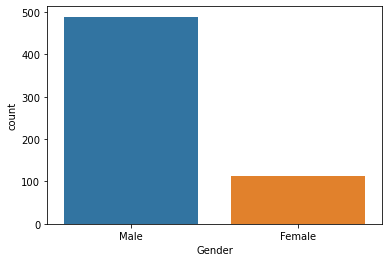

In [9]:
ax=sns.countplot(x="Gender",data=df)
print(df["Gender"].value_counts())

In [10]:
df['Gender']=df['Gender'].fillna('Male')

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

Yes    398
No     213
Name: Married, dtype: int64


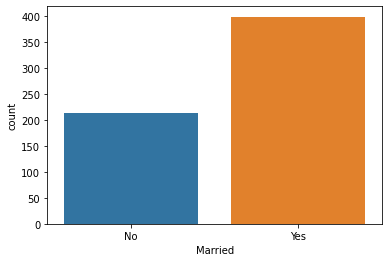

In [13]:
ax=sns.countplot(x="Married",data=df)
print(df["Married"].value_counts())

In [14]:
df['Married']=df['Married'].fillna('Yes')

No     500
Yes     82
Name: Self_Employed, dtype: int64


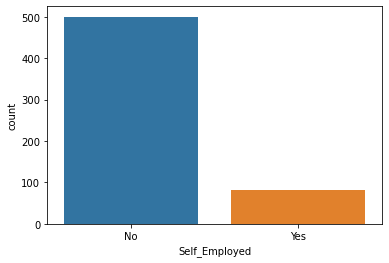

In [15]:
ax=sns.countplot(x="Self_Employed",data=df)
print(df["Self_Employed"].value_counts())

In [16]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


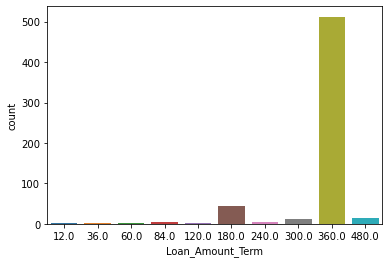

In [17]:
ax=sns.countplot(x="Loan_Amount_Term",data=df)
print(df["Loan_Amount_Term"].value_counts())

In [18]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


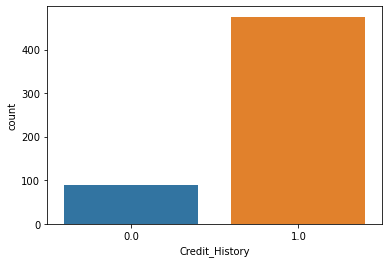

In [19]:
ax=sns.countplot(x="Credit_History",data=df)
print(df["Credit_History"].value_counts())

In [20]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [21]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


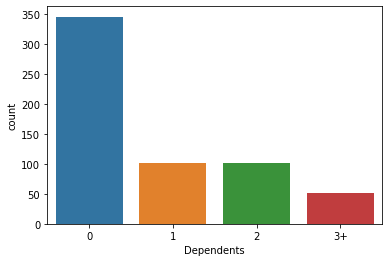

In [22]:
ax=sns.countplot(x="Dependents",data=df)
print(df["Dependents"].value_counts())

In [23]:
df['Dependents']=df['Dependents'].fillna(0)

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
#lets check zeros 
#lets check
count=(df==0).sum()
count

Loan_ID                0
Gender                 0
Married                0
Dependents            15
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [26]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

In [27]:
# as there are object type data lete encode that
# for that import libraries
from sklearn.preprocessing import LabelEncoder

In [28]:
lab_enc=LabelEncoder()

In [29]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
df2=lab_enc.fit_transform(df['Gender'])
df['Gender']=df2
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,1621.245798,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,1621.245798,141.000000,360.0,1.0,Urban,Y


In [31]:
df2=lab_enc.fit_transform(df['Married'])
df['Married']=df2
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,1621.245798,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,1621.245798,141.000000,360.0,1.0,Urban,Y


In [32]:
df2=lab_enc.fit_transform(df['Education'])
df['Education']=df2
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,No,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,Yes,3000,1621.245798,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,No,6000,1621.245798,141.000000,360.0,1.0,Urban,Y


In [33]:
df2=lab_enc.fit_transform(df['Self_Employed'])
df['Self_Employed']=df2
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,1621.245798,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,1621.245798,141.000000,360.0,1.0,Urban,Y


In [34]:
df2=lab_enc.fit_transform(df['Property_Area'])
df['Property_Area']=df2
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,1621.245798,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,1621.245798,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,1621.245798,141.000000,360.0,1.0,2,Y


In [35]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
dtype: object

In [36]:
df2=lab_enc.fit_transform(df['Loan_Status'])
df['Loan_Status']=df2
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,1621.245798,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,1621.245798,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,1621.245798,141.000000,360.0,1.0,2,1


In [40]:
df['Dependents'].unique

<bound method Series.unique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>

In [41]:
df['Dependents'].nunique

<bound method IndexOpsMixin.nunique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>

In [43]:
df['Dependents']=df['Dependents'].replace("3+",np.nan)

In [46]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
df['Dependents']=df['Dependents'].fillna(3)

In [49]:
df['Dependents']=df['Dependents'].astype(int)

In [50]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [51]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    9.677699
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [52]:
# lets deal with skewness
from sklearn.preprocessing import PowerTransformer


In [53]:
scaler=PowerTransformer(method='yeo-johnson')

In [54]:
features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [55]:
df[features]=scaler.fit_transform(df[features].values)
df[features]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-0.345723,0.235387,0.175540,0.411733
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,-0.479743,-0.037659,0.175540,0.411733
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-0.345723,-1.346305,0.175540,0.411733
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.349217,-0.167886,0.175540,0.411733
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-0.345723,0.158610,0.175540,0.411733
...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-0.345723,-1.205100,0.175540,0.411733
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-0.345723,-2.293317,-2.312879,0.411733
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,-3.846027,1.372409,0.175540,0.411733
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-0.345723,0.738924,0.175540,0.411733


In [56]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome    0.024058
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [59]:
df=df.drop('Loan_ID',axis=1)

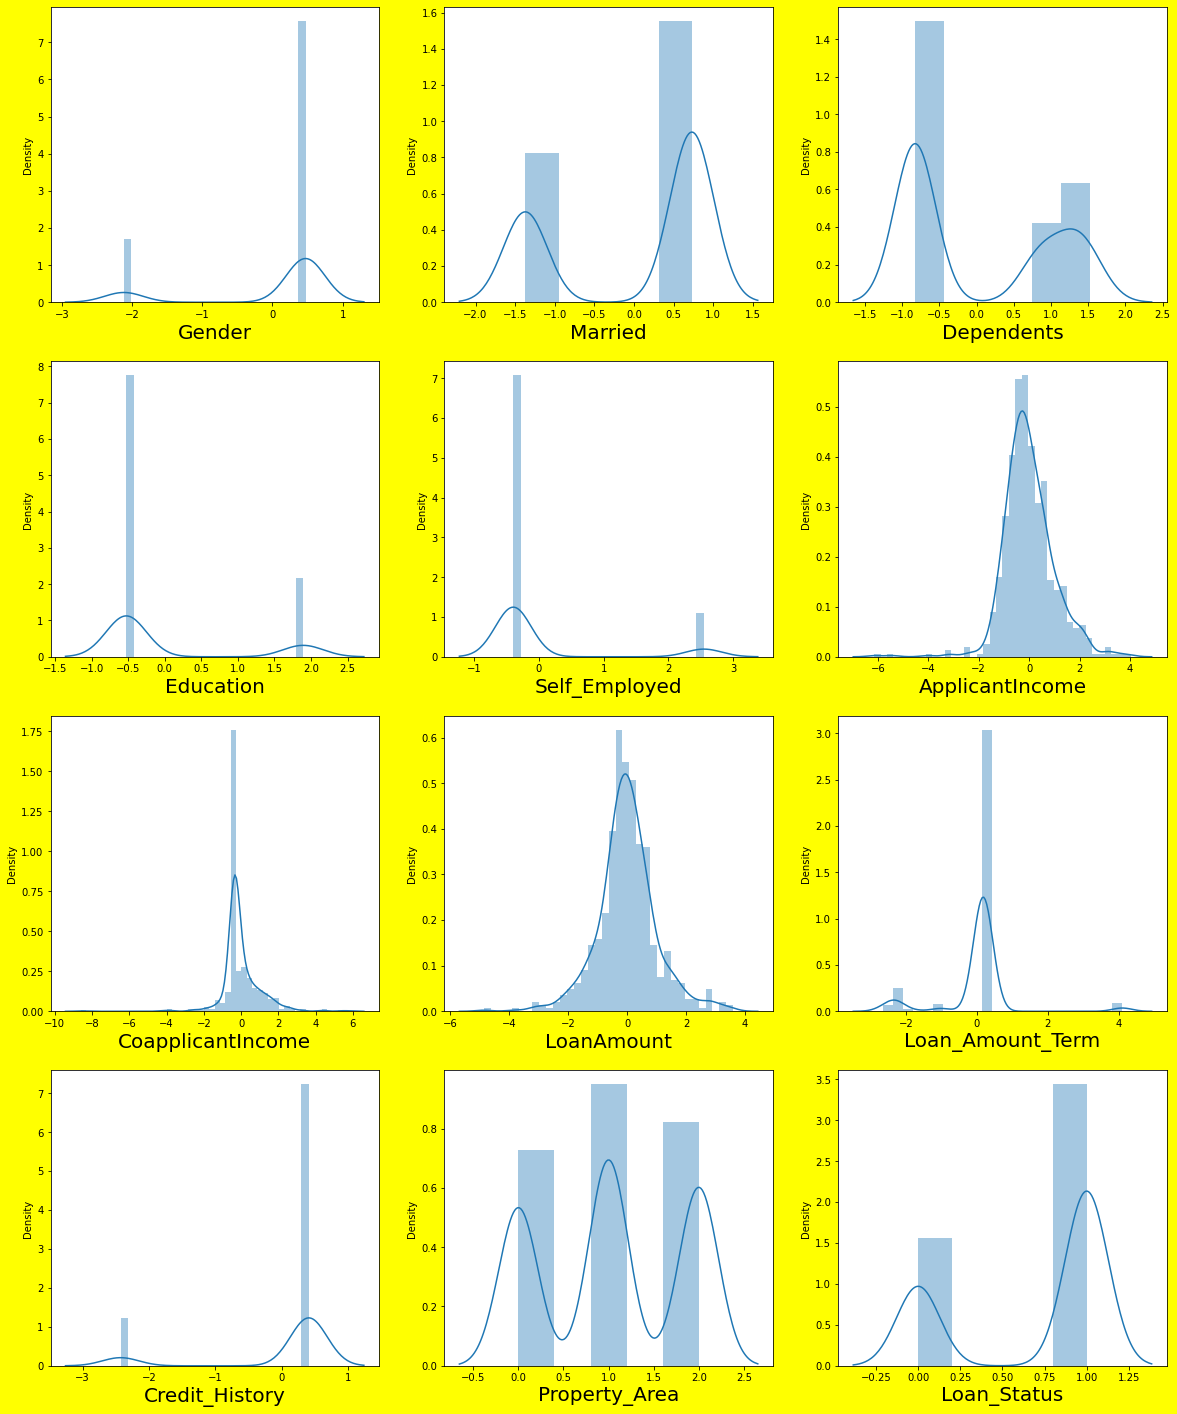

In [60]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [61]:
# lets split the dataset
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [62]:
# lets import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

In [67]:
# initialising logistic regression
lr=LogisticRegression()

In [68]:
lr.fit(x_train,y_train)

LogisticRegression()

In [69]:
from sklearn.metrics import r2_score

In [70]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [71]:
print(f"the training accuracy is{r2_score(y_train,pred_train)}")
print(f"testing accuracy is{r2_score(y_test,pred_test)}")

the training accuracy is0.14395183360700592
testing accuracy is0.05070590574666933


In [77]:
knn=KNeighborsClassifier()

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("train result\n")
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("testing result")
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")


In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
# calling the function and pass dataset to check the score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

train result

accuracy score:82.83%
testing result
accuracy score:77.92%


In [82]:
# cross validation


In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
# cross validation to check the model is overfitting or not

In [85]:
cross_val_score(knn,x,y,cv=5)

array([0.80487805, 0.73170732, 0.76422764, 0.77235772, 0.76229508])

In [86]:
cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean()

0.767093162734906

In [87]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid={'algorithm':['kd_tree','brute'],
           'leaf_size':[3,5,6,7,8],
           'n_neighbors':[3,5,7,9,11,13]}
gridsrch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [90]:
gridsrch.fit(x_train,y_train)
gridsrch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [91]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=13)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [92]:
#calling the function

metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


train result

accuracy score:81.74%
testing result
accuracy score:79.87%


In [93]:
from sklearn.svm import SVC

In [95]:
svc=SVC()

In [96]:
svc.fit(x_train,y_train)

SVC()

In [97]:
#calling the function

metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


train result

accuracy score:83.48%
testing result
accuracy score:79.87%


In [98]:
# saving the model
import pickle

In [99]:
pickle.dump(knn,open('loan','wb'))

In [100]:
loaded_model=pickle.load(open('loan','rb'))

In [101]:
result=loaded_model.score(x_test,y_test)
print(result*100)

79.87012987012987


In [102]:
#===================thank you===================